In [23]:
require(HH)

In [24]:
require(hnp)

In [25]:
require(ggplot2)

In [26]:
y=c(82,106,63,99,101,45,34,26,44,42,31,22,16,30,29,22,14,10,21,20,15,8,6
    ,14,13,10,8,11,10,10,8,8,3,8,1,58,58,62,58,73,27,28,31,28,38,19,
    20,22,20,28,14,14,15,14,21,9,10,12,10,16,7,3,1,
    8,7,4,3,2,8,4)

x=c(0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.75,0.75,0.75,0.75,0.75,1,1,1,1,1,1.25,1.25,1.25,1.25,1.25,
    1.5,1.5,1.5,1.5,1.5,1.75,1.75,1.75,1.75,1.75,0,0,0,0,0,
    0.5,0.5,0.5,0.5,0.5,rep(0.75,5),rep(1,5),rep(1.25,5),rep(1.5,5),rep(1.75,5))

strain=c(rep("1",35),rep(2,35))

In [27]:
modelo=glm(y~x+strain,family="poisson"(link="log"))
modelo


Call:  glm(formula = y ~ x + strain, family = poisson(link = "log"))

Coefficients:
(Intercept)            x      strain2  
      4.455       -1.543       -0.275  

Degrees of Freedom: 69 Total (i.e. Null);  67 Residual
Null Deviance:	    1359 
Residual Deviance: 86.38 	AIC: 416

In [28]:
summary(modelo)


Call:
glm(formula = y ~ x + strain, family = poisson(link = "log"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6800  -0.6766   0.1528   0.6787   2.0774  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.45464    0.03914 113.819  < 2e-16 ***
x           -1.54308    0.04660 -33.111  < 2e-16 ***
strain2     -0.27497    0.04837  -5.684 1.31e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1359.381  on 69  degrees of freedom
Residual deviance:   86.376  on 67  degrees of freedom
AIC: 415.95

Number of Fisher Scoring iterations: 4


Poisson model 


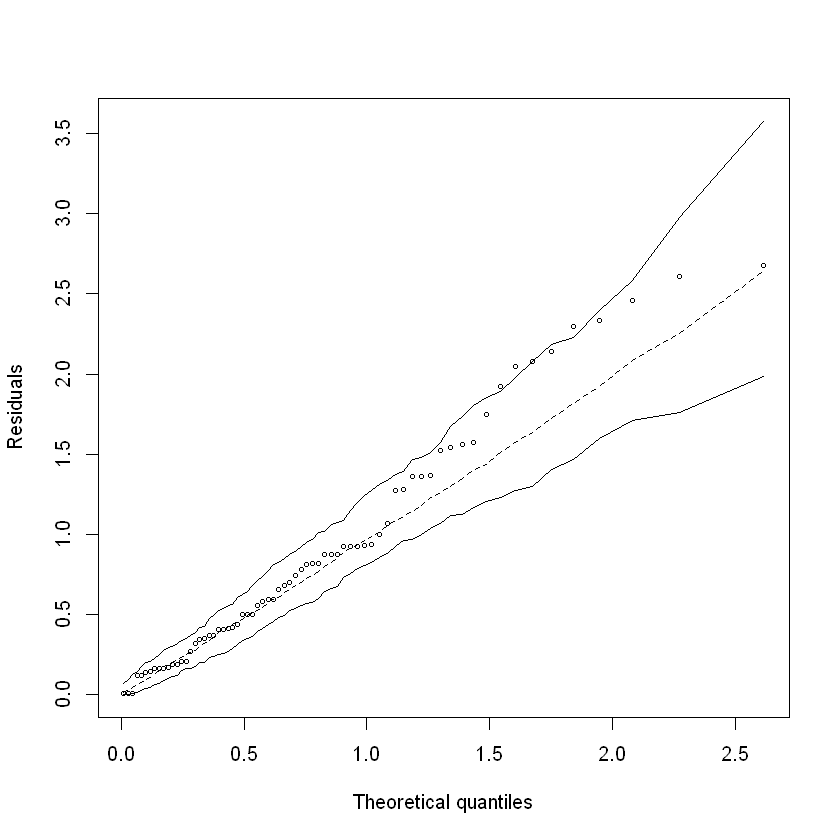

In [29]:
hnp(modelo)

In [30]:
#Intervalo de confiança pros betas
confint(modelo,level=0.99)

Waiting for profiling to be done...


,0.5 %,99.5 %
(Intercept),4.3525720,4.554219
x,-1.6640009,-1.423866
strain2,-0.3999625,-0.150683


In [31]:
modelo$coefficients

(Intercept)           x     strain2 
  4.4546400  -1.5430795  -0.2749686

In [32]:
modelo$model

y,x,strain
82,0.00,1
106,0.00,1
63,0.00,1
99,0.00,1
101,0.00,1
45,0.50,1
34,0.50,1
26,0.50,1
44,0.50,1
42,0.50,1


In [33]:
diag(vcov(modelo))

(Intercept)           x     strain2 
0.001531769 0.002171847 0.002339888

In [34]:
model.matrix(modelo)[1,]

(Intercept)           x     strain2 
          1           0           0

In [35]:
var=model.matrix(modelo)[1,]%*%vcov(modelo)%*%t(t(model.matrix(modelo)[1,]))

In [36]:
exp(c(model.matrix(modelo)[1,]%*%modelo$coefficients-qnorm(0.975)*sqrt(var),model.matrix(modelo)[1,]%*%modelo$coefficients+qnorm(0.975)*sqrt(var)))

[1] 79.67304 92.88375

In [37]:
exp(model.matrix(modelo)[1,]%*%modelo$coefficients)

86.02518


In [38]:
model.matrix(modelo)[1,]%*%modelo$coefficients

4.45464


In [39]:
modelo2=glm.nb(y~x+strain)
summary(modelo2)


Call:
glm.nb(formula = y ~ x + strain, init.theta = 123.2830658, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6556  -0.6768   0.1293   0.6505   1.8073  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.44643    0.04828  92.099  < 2e-16 ***
x           -1.53971    0.05259 -29.276  < 2e-16 ***
strain2     -0.26199    0.05575  -4.699 2.61e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(123.2831) family taken to be 1)

    Null deviance: 1102.340  on 69  degrees of freedom
Residual deviance:   71.825  on 67  degrees of freedom
AIC: 415.47

Number of Fisher Scoring iterations: 1


              Theta:  123 
          Std. Err.:  102 

 2 x log-likelihood:  -407.473 

Negative binomial model (using MASS package) 


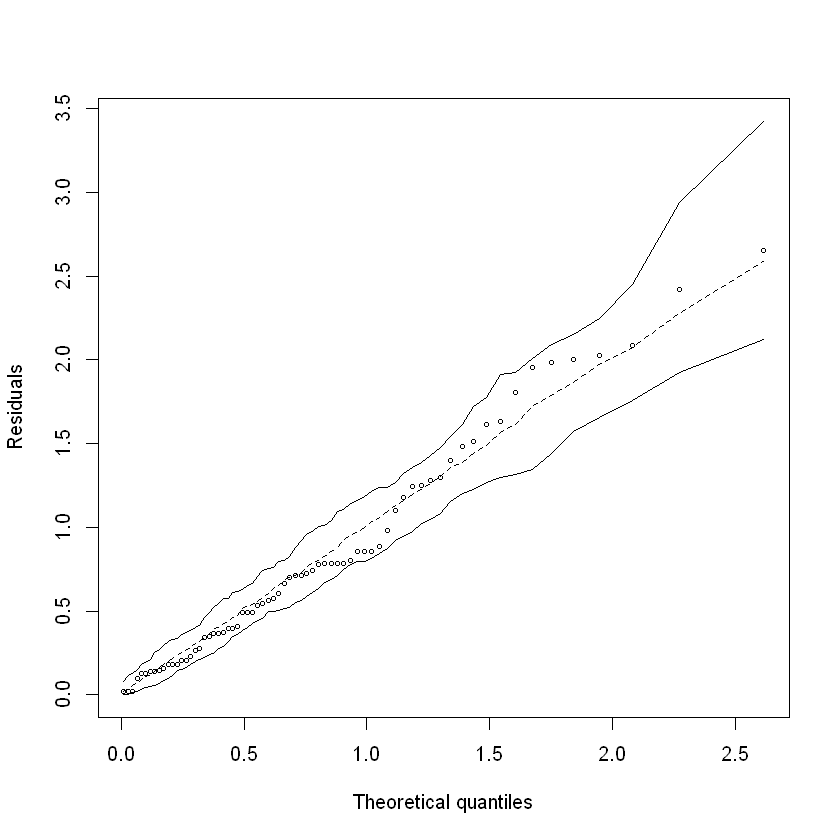

In [40]:
hnp(modelo2)

In [41]:
#Intervalo de confiança para os preditores lineares.
interval(modelo)[,1:3]

,fit,ci.low,ci.hi
1,4.454640,4.376521,4.532759
2,4.454640,4.376521,4.532759
3,4.454640,4.376521,4.532759
4,4.454640,4.376521,4.532759
5,4.454640,4.376521,4.532759
6,3.683100,3.619656,3.746544
7,3.683100,3.619656,3.746544
8,3.683100,3.619656,3.746544
9,3.683100,3.619656,3.746544
10,3.683100,3.619656,3.746544


In [42]:
dados=data.frame(y,x,strain,modelo$fitted.values)
dados

y,x,strain,modelo.fitted.values
82,0.00,1,86.025177
106,0.00,1,86.025177
63,0.00,1,86.025177
99,0.00,1,86.025177
101,0.00,1,86.025177
45,0.50,1,39.769498
34,0.50,1,39.769498
26,0.50,1,39.769498
44,0.50,1,39.769498
42,0.50,1,39.769498


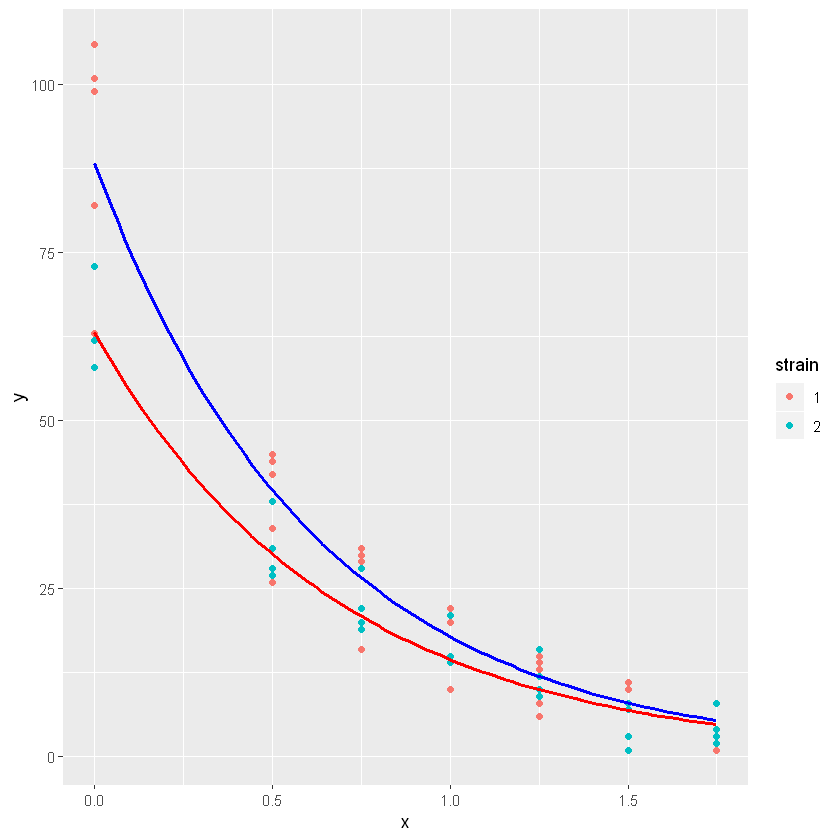

In [43]:
(ggplot(dados)+aes(x,y)+geom_point(aes(color=strain))
+geom_smooth(color="blue",method=glm, method.args = list(family = poisson(link="log"))
             ,se=F,data=dados[dados$strain=="1",])+
  geom_smooth(color="red",method=glm, method.args = list(family = poisson(link="log"))
              ,se=F,data=dados[dados$strain=="2",]))